In [4]:
import matplotlib as mpl
import pandas as pd
import seaborn as sns

import config

In [5]:
CFG = config.Config()

In [6]:
dataset: pd.DataFrame = (
    pd.read_parquet(CFG.final_data_files["user_interactions"])
)

In [7]:
dataset["userType"].value_counts()

userType
bot      4956
human    1772
Name: count, dtype: int64

In [8]:
dataset_wo_bots = dataset[dataset["userType"] == "human"]

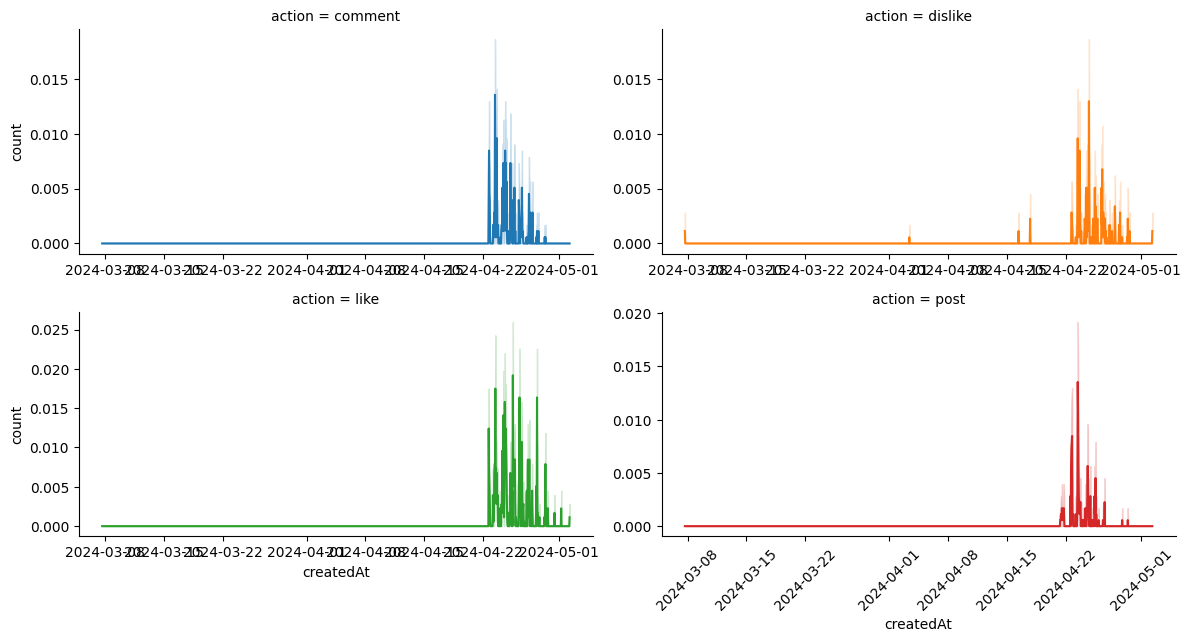

In [9]:
grid = sns.FacetGrid(
    (
        dataset_wo_bots
        .reset_index("createdAt")
        .groupby(pd.Grouper(key="createdAt", axis=0, freq="h"))
        .value_counts()
        .to_frame()
        .reset_index()
    ),
    col="action",
    col_wrap=2,
    hue='action',
    sharey=False,
    sharex=False,
    aspect=2
)

grid.map_dataframe(
    sns.lineplot, 
    x="createdAt",
    y="count",
)

mpl.pyplot.xticks(rotation=45)
mpl.pyplot.savefig(f'{CFG.report_dir}/plot.timeline.user_actions.pdf', format='pdf', bbox_inches="tight")

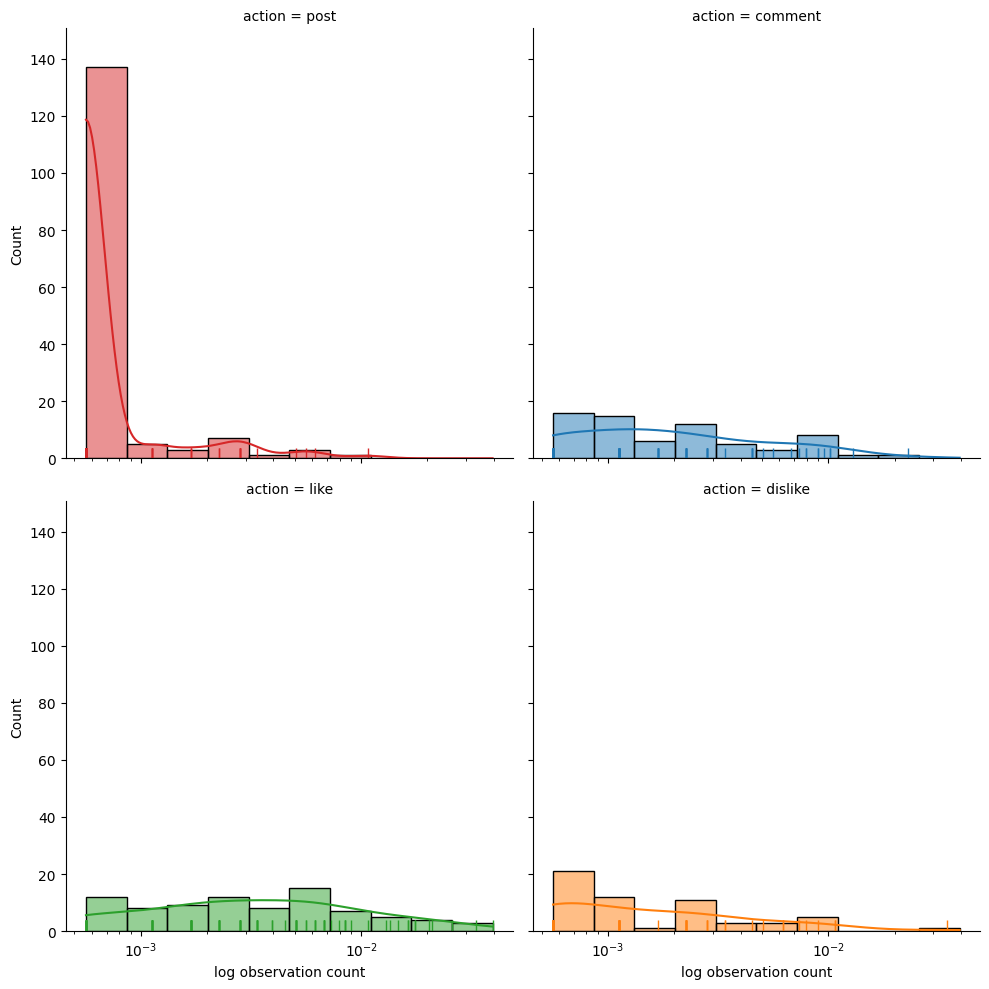

In [10]:
sns.displot(
    data=dataset_wo_bots.reset_index()[["userId", "action"]].value_counts(normalize=True).reset_index(),
    x='proportion',
    hue='action',
    col='action',
    col_wrap=2,
    col_order=[
        "post", "comment",
        "like", "dislike"
    ],
    log_scale=True,
    kde=True,
    rug=True,
    legend=None
).set(
    xlabel="log observation count"
)
mpl.pyplot.savefig(f'{CFG.report_dir}/plot.hist.user_actions.pdf', format='pdf', bbox_inches="tight")